In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

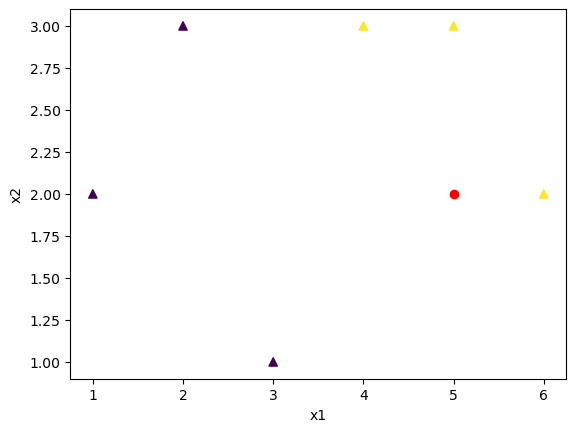

In [36]:
x_train=[
    [1., 2.],
    [2., 3.],
    [3., 1.],
    [4., 3.],
    [5., 3.],
    [6., 2.],
]
y_train=[
    [0.], [0.], [0.],[1.],[1.],[1.] #x2를 y의 데이터를 통해 0과 1로 구분
]
x_test=[[5.,2.]]
y_test=[[1.]]

x1=[x[0] for x in x_train]
x2=[x[1] for x in x_train]

#그래프 그리기
colors=[int(y[0]%3) for y in y_train]
plt.scatter(x1,x2,c=colors, marker='^') #x축, y축, 색깔, 점 모양
plt.scatter(x_test[0][0],x_test[0][1],c="red") #Test 데이터는 빨간점 위치로 추론시 1의 값을 가짐

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [26]:
#tf 데이터셋에서 x_train과 y_train을 x_train의 길이 배치만큼 쪼갬
dataset=tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

W=tf.Variable(tf.zeros([2,1]),name='weight') #x_train은 2행 1열이기 때문에 텐서 쉐이프를 [2,1]로 지정
b=tf.Variable(tf.zeros([1]),name='bias')
EPOCHS=3000

In [ ]:
#Hypothesis Representation과 Sigmoid/Logistic Function 구현
def logistic_regression(features):
    #tf.matmul(features, W) + b): Linear 값
    #tf.exp: Sigmoid 함수
    hypothesis  = tf.divide(1., 1. + tf.exp(tf.matmul(features, W) + b))
    return hypothesis

In [34]:
#Cost Function 구현
def loss_fn(hypothesis, features, labels): #cost(h0,(x),y) 함수, x를 features로 정의
    hypothesis = logistic_regression(features) #h0 구하기
    cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features)) + (1 - labels) * tf.math.log(1 - hypothesis)) #cost함수 값 구하기
    return cost

In [ ]:
#Optimizer 구현: convex한 cost을 최소화시키기
def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features),features,labels)
    return tape.gradient(loss_value, [W,b]) #cost함수 그래프의 기울기 값 업데이트

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [33]:
#데이터 학습
for step in range(EPOCHS+1): #1 epoch 당 6 iteration
    for features, labels  in iter(dataset):
        grads = grad(logistic_regression(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b])) #cost 최솟값 업데이트
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))

Iter: 0, Loss: 0.1284
Iter: 100, Loss: 0.1276
Iter: 200, Loss: 0.1267
Iter: 300, Loss: 0.1259
Iter: 400, Loss: 0.1252
Iter: 500, Loss: 0.1244
Iter: 600, Loss: 0.1236
Iter: 700, Loss: 0.1228
Iter: 800, Loss: 0.1221
Iter: 900, Loss: 0.1213
Iter: 1000, Loss: 0.1206
Iter: 1100, Loss: 0.1199
Iter: 1200, Loss: 0.1192
Iter: 1300, Loss: 0.1185
Iter: 1400, Loss: 0.1178
Iter: 1500, Loss: 0.1171
Iter: 1600, Loss: 0.1164
Iter: 1700, Loss: 0.1157
Iter: 1800, Loss: 0.1151
Iter: 1900, Loss: 0.1144
Iter: 2000, Loss: 0.1138
Iter: 2100, Loss: 0.1131
Iter: 2200, Loss: 0.1125
Iter: 2300, Loss: 0.1119
Iter: 2400, Loss: 0.1112
Iter: 2500, Loss: 0.1106
Iter: 2600, Loss: 0.1100
Iter: 2700, Loss: 0.1094
Iter: 2800, Loss: 0.1088
Iter: 2900, Loss: 0.1082
Iter: 3000, Loss: 0.1077


In [37]:
#새로운 데이터로 확인
def accuracy_fn(hypothesis, labels):
    predicted=tf.cast(hypothesis>0.5, dtype=tf.float32) #0.5: Decision Boundary
    accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    return accuracy

test_acc=accuracy_fn(logistic_regression(x_test),y_test)
print(test_acc)

tf.Tensor(1, shape=(), dtype=int32)
